## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [2]:
# import librarys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
! ls zippedData/

bom.movie_gross.csv.gz
imdb.name.basics.csv.gz
imdb.title.akas.csv.gz
imdb.title.basics.csv.gz
imdb.title.crew.csv.gz
imdb.title.principals.csv.gz
imdb.title.ratings.csv.gz
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz


## Rotten Tomatoes Data

In [4]:
#reading rt movie and reviews in notebook
rt_movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')
rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='iso8859_1')

#merge the to dataframes
rt_df = pd.merge(rt_movie_info, rt_reviews, on = 'id')

#droping the na's
rt_movie_info = rt_movie_info.dropna()
rt_df = rt_df.dropna()

#change the box_office in floats
rt_movie_info['box_office'] = rt_movie_info['box_office'].str.replace(',', '').astype('float')
rt_df['box_office'] =  rt_df['box_office'].str.replace(',', '').astype('float')

#spliting the values of genre in rows
rt_movie_info['genre'] = rt_movie_info['genre'].str.split('|')
rt_movie_info = rt_movie_info.explode('genre')

rt_df['genre'] = rt_df['genre'].str.split('|')
rt_df = rt_df.explode('genre')

rt_df.head(1)

,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,review,rating_y,fresh,critic,top_critic,publisher,date
0,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"


In [5]:
rt_movie_info['synopsis'].values[10]

"A comic series of short vignettes build on one another to create a cumulative effect, as the characters discuss things as diverse as caffeine popsicles, Paris in the '20s, and the use of nicotine as an insecticide--all the while sitting around sipping coffee and smoking cigarettes. As director Jim Jarmusch delves into the normal pace of our world from an extraordinary angle, he shows just how absorbing the obsessions, joys and addictions of life can be, if truly observed."

Text(0.5, 0, 'Genre Produced Count')

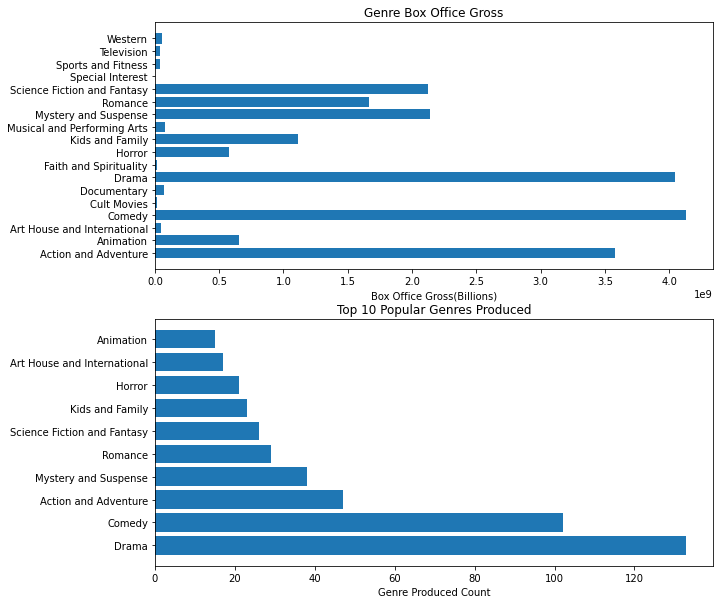

In [6]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10, 10))
x1 = list(rt_movie_info.groupby(['genre']).sum()['box_office'].keys())
y1 = list(rt_movie_info.groupby(['genre']).sum()['box_office'].values)

x2 = list(rt_movie_info['genre'].value_counts().head(10).keys())
y2 = list(rt_movie_info['genre'].value_counts().head(10).values)

ax1.barh(x1,y1)
ax1.set_title('Genre Box Office Gross')
ax1.set_xlabel('Box Office Gross(Billions)')

ax2.barh(x2,y2)
ax2.set_title('Top 10 Popular Genres Produced')
ax2.set_xlabel('Genre Produced Count')

#plt.draw()

#ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='right')
#ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha='right');

## The Movies DB Data

In [7]:
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')

#clean punctuation from row values
tmdb_movies['genre_ids'] = tmdb_movies['genre_ids'].str.replace('[^\w\s]','')

#change value in list of values
tmdb_movies['genre_ids'] = tmdb_movies['genre_ids'].str.split(' ')

In [8]:
#data from 'https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee'
tmdb_genre_ids = [('Action', '28'), ('Adventure', '12'), ('Animation', '16'), ('Comedy', '35'),
('Crime', '80'), ('Documentary', '99'), ('Drama', '18'), ('Family', '10751'),
('Fantasy', '14'), ('History', '36'), ('Horror', '27'), ('Music', '10402'),
('Mystery', '9648'), ('Romance', '10749'), ('Science Fiction', '878'),
('TV Movie', '10770'), ('Thriller', '53'), ('War', '10752'), ('Western', '37')]

def id_rename(id_value):
    new_id_name = []
    for id_num in id_value:
        for id_pair in tmdb_genre_ids:
            if id_num == id_pair[1]:
                new_id_name.append(id_pair[0])
    return new_id_name

new_id_list = []

for ids in tmdb_movies['genre_ids']:
    new_id_list.append(id_rename(ids))
    
tmdb_movies['genre2'] = new_id_list

In [9]:
tmdb_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre2
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,"[Adventure, Fantasy, Family]"
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"[Fantasy, Adventure, Animation, Family]"
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,"[Adventure, Action, Science Fiction]"
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"[Animation, Comedy, Family]"
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,"[Action, Science Fiction, Adventure]"
...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,"[Horror, Drama]"
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,"[Drama, Thriller]"
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,"[Fantasy, Action, Adventure]"
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,"[Family, Adventure, Action]"


## The Numbers Data

In [10]:
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

#changing the str in to int
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace('[\$,]', '').astype('float')
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str.replace('[\$,]', '').astype('float')
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.replace('[\$,]', '').astype('float')

#droping the 0 values
drop_domestic_gross = tn_movie_budgets.index[tn_movie_budgets['domestic_gross'] == 0].tolist()
drop_worldwide_gross = tn_movie_budgets.index[tn_movie_budgets['worldwide_gross'] == 0].tolist()
drop_both = drop_domestic_gross + drop_worldwide_gross
tn_movie_budgets = tn_movie_budgets.drop(tn_movie_budgets.index[drop_both])

tn_movie_budgets.head(1)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09


## Merged: The Movies DB Data with The Numbers Data

In [11]:
tmdb_tn_df = pd.merge(tn_movie_budgets, tmdb_movies, left_on = 'movie', right_on = 'original_title')

In [12]:

tmdb_tn_df['genre3'] = tmdb_tn_df.genre2.apply(', '.join)

In [13]:
tmdb_tn_df.head(1)

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count,genre2,genre3
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676,"[Action, Adventure, Fantasy, Science Fiction]","Action, Adventure, Fantasy, Science Fiction"


# Top 10 Genre Combos

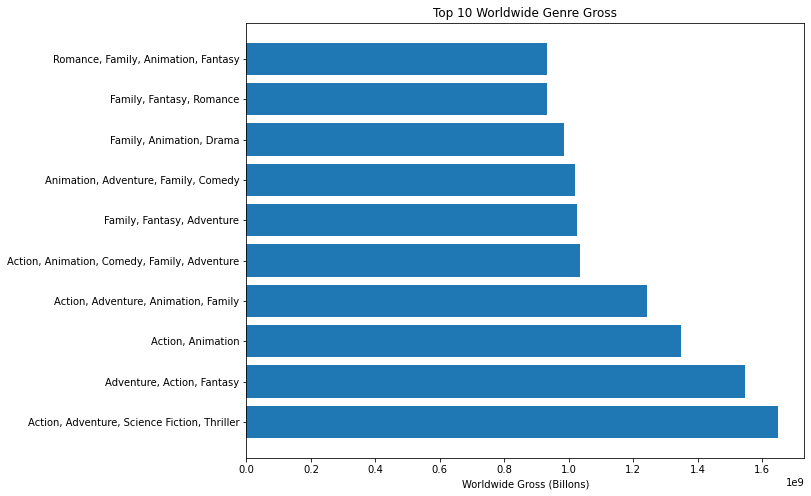

In [18]:
fig, ax = plt.subplots(1,1, figsize=(10, 8))
x = list(tmdb_tn_df.groupby(['genre3']).mean()['worldwide_gross'].sort_values(ascending=False).head(10).keys())
y = list(tmdb_tn_df.groupby(['genre3']).mean()['worldwide_gross'].sort_values(ascending=False).head(10).values)

ax.barh(x,y);
ax.set_title('Top 10 Worldwide Genre Gross')
ax.set_xlabel('Worldwide Gross (Billons)');

# Top 10 Gerne Single

In [15]:
tmdb_tn_df_single = tmdb_tn_df

In [19]:
tmdb_tn_df_single.head(1)

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count,genre2,genre3
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676,"[Action, Adventure, Fantasy, Science Fiction]","Action, Adventure, Fantasy, Science Fiction"


In [32]:
tmdb_tn_df_single['genre_single'] = tmdb_tn_df_single['genre3'].str.split(',')
tmdb_tn_df_single = tmdb_tn_df_single.explode('genre_single')
tmdb_tn_df_single['genre_single'] = tmdb_tn_df_single['genre_single'].str.strip()

In [33]:
tmdb_tn_df_single.head(1)

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count,genre2,genre3,genre_single
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676,"[Action, Adventure, Fantasy, Science Fiction]","Action, Adventure, Fantasy, Science Fiction",Action


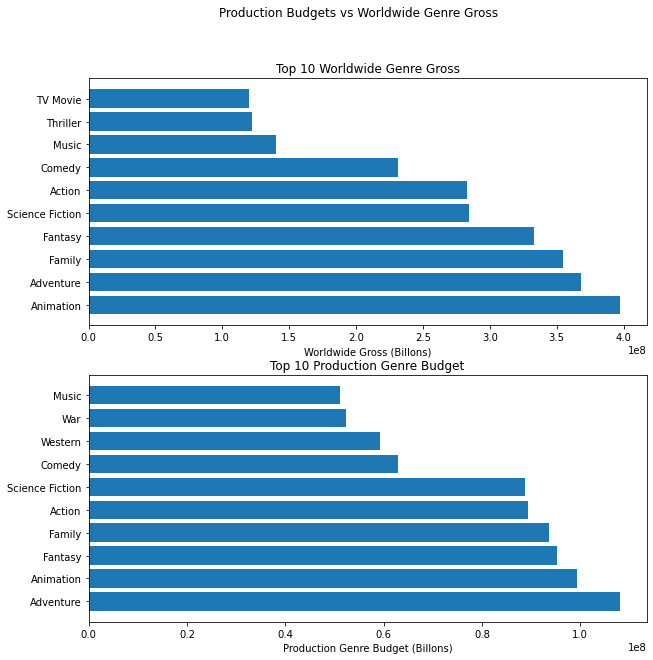

In [45]:
fig, [ax1,ax2] = plt.subplots(2,1, figsize=(10, 10))
x1 = list(tmdb_tn_df_single.groupby(['genre_single']).mean()['worldwide_gross'].sort_values(ascending=False).head(10).keys())
y1 = list(tmdb_tn_df_single.groupby(['genre_single']).mean()['worldwide_gross'].sort_values(ascending=False).head(10).values)

x2 = list(tmdb_tn_df_single.groupby(['genre_single']).mean()['production_budget'].sort_values(ascending=False).head(10).keys())
y2 = list(tmdb_tn_df_single.groupby(['genre_single']).mean()['production_budget'].sort_values(ascending=False).head(10).values)

fig.suptitle('Production Budgets vs Worldwide Genre Gross', fontsize=12)

ax1.barh(x1,y1);
ax1.set_title('Top 10 Worldwide Genre Gross')
ax1.set_xlabel('Worldwide Gross (Billons)')

ax2.barh(x2,y2);
ax2.set_title('Top 10 Production Genre Budget')
ax2.set_xlabel('Production Genre Budget (Billons)');